<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/ANN_Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

--2024-07-28 05:47:21--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: ‘UCI-HAR.zip’

UCI-HAR.zip         100%[===================>]  58.17M  58.8MB/s    in 1.0s    

2024-07-28 05:47:23 (58.8 MB/s) - ‘UCI-HAR.zip’ saved [60999314/60999314]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
!unzip -n UCI-HAR.zip

Archive:  UCI-HAR.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR Dataset

In [ ]:
!ls

 __MACOSX   sample_data  'UCI HAR Dataset'   UCI-HAR.zip


In [ ]:
!ls 'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


  As we can see we have few files that contain information about dataset.<br>
  The actual data is in test and train folder

In [ ]:
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [ ]:
!head 'UCI HAR Dataset/train/subject_train.txt'

1
1
1
1
1
1
1
1
1
1


In [ ]:
!head 'UCI HAR Dataset/train/X_train.txt'

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [ ]:
!head 'UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


When we see for all the unique values in y_train, we will see that actually it starts from 1-6, so we need to subtract 1 from it.

In [ ]:
!ls 'UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


As you can see it contain the 9 different measurments, so our data will be in format of N * D * T

In [ ]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt'

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

#### Let's see at some basic data

In [ ]:
df = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.030191,0.043711,0.035688,0.040402,0.047097,0.050185,0.050545,0.044992,0.047686,0.046812,...,0.012667,0.010475,0.011098,0.013411,0.018454,0.025197,0.032328,0.039852,0.037449,0.028818
1,0.017111,0.024179,0.030229,0.032029,0.031266,0.028254,0.019643,0.011177,0.011124,0.010621,...,-0.013667,-0.020857,-0.029342,-0.030037,-0.029480,-0.026172,-0.026406,-0.034741,-0.037973,-0.038650
2,0.026189,0.021651,0.014551,0.014815,0.016694,0.014634,0.015270,0.021350,0.029625,0.039202,...,-0.022659,-0.016851,-0.017540,-0.019214,-0.017094,-0.018794,-0.020599,-0.020910,-0.022114,-0.020235
3,-0.037516,-0.033097,-0.030360,-0.025009,-0.019264,-0.010177,-0.001798,-0.005482,-0.007692,-0.003543,...,-0.019424,-0.020114,-0.019540,-0.017057,-0.013911,-0.015316,-0.017816,-0.020150,-0.016960,-0.007120
4,-0.019429,-0.019091,-0.014816,-0.013979,-0.017984,-0.021282,-0.022177,-0.021685,-0.023053,-0.023746,...,0.019676,0.020304,0.018784,0.015992,0.014330,0.012444,0.012461,0.011451,0.012684,0.015605


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


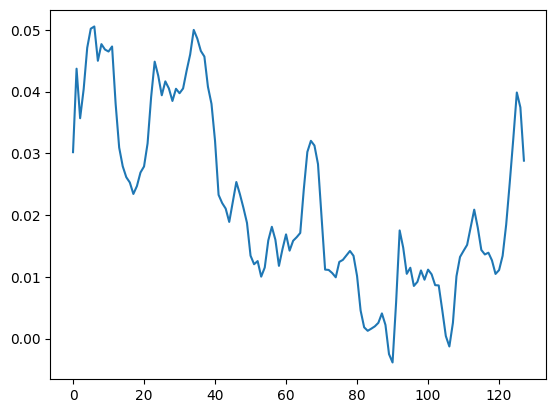

In [ ]:
df.iloc[0].plot();

In [ ]:
# Let's define some of the variables.
N_train = 7352
N_test = 2947
D = 9
T = 128
K = 6 # 6 different classes

#### Load Data function

In [ ]:
!ls 'UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt


In [ ]:
# Load Data
def load_data():
  """
    Return:
      X_train, Y_train, X_test, Y_test
  """

  X_train, X_test = np.zeros((N_train, T, D)), np.zeros((N_test, T, D))

  train_files = [
      'body_acc_x_train.txt',  'body_gyro_x_train.txt',  'total_acc_x_train.txt',
      'body_acc_y_train.txt',  'body_gyro_y_train.txt',  'total_acc_y_train.txt',
      'body_acc_z_train.txt',  'body_gyro_z_train.txt',  'total_acc_z_train.txt'
  ]

  train_prefix = 'UCI HAR Dataset/train/Inertial Signals/'

  for d, fn in enumerate(train_files):
    df = pd.read_csv(train_prefix + fn, delim_whitespace=True, header=None)

    x = df.to_numpy()
    X_train[:,:,d] = x

    # Train labels
  Y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None).to_numpy() - 1
  Y_train = Y_train.flatten()


  # Let's do the same for test files as well

  test_files = [
        'body_acc_x_test.txt',  'body_gyro_x_test.txt',  'total_acc_x_test.txt',
        'body_acc_y_test.txt',  'body_gyro_y_test.txt',  'total_acc_y_test.txt',
        'body_acc_z_test.txt',  'body_gyro_z_test.txt',  'total_acc_z_test.txt'
  ]

  test_prefix = 'UCI HAR Dataset/test/Inertial Signals/'

  for d, fn in enumerate(test_files):
    df = pd.read_csv(test_prefix + fn, delim_whitespace=True, header=None)

    x = df.to_numpy()
    X_test[:,:,d] = x

  # Test labels
  Y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None).to_numpy() - 1
  Y_test = Y_test.flatten()

  return X_train, Y_train, X_test, Y_test

In [ ]:
X_train, Y_train, X_test, Y_test = load_data()

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(7352, 128, 9) (7352,)
(2947, 128, 9) (2947,)


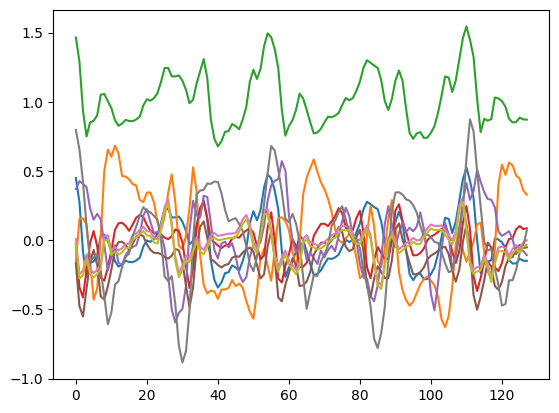

In [ ]:
# Plot all 9 series of length 128
plt.plot(X_train[6000,:,:]);

In [ ]:
inputs = []
features = []
for d in range(D):
  i = Input((T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

x = Concatenate()(features)
output = Dense(K)(x)
model = Model(inputs, output)

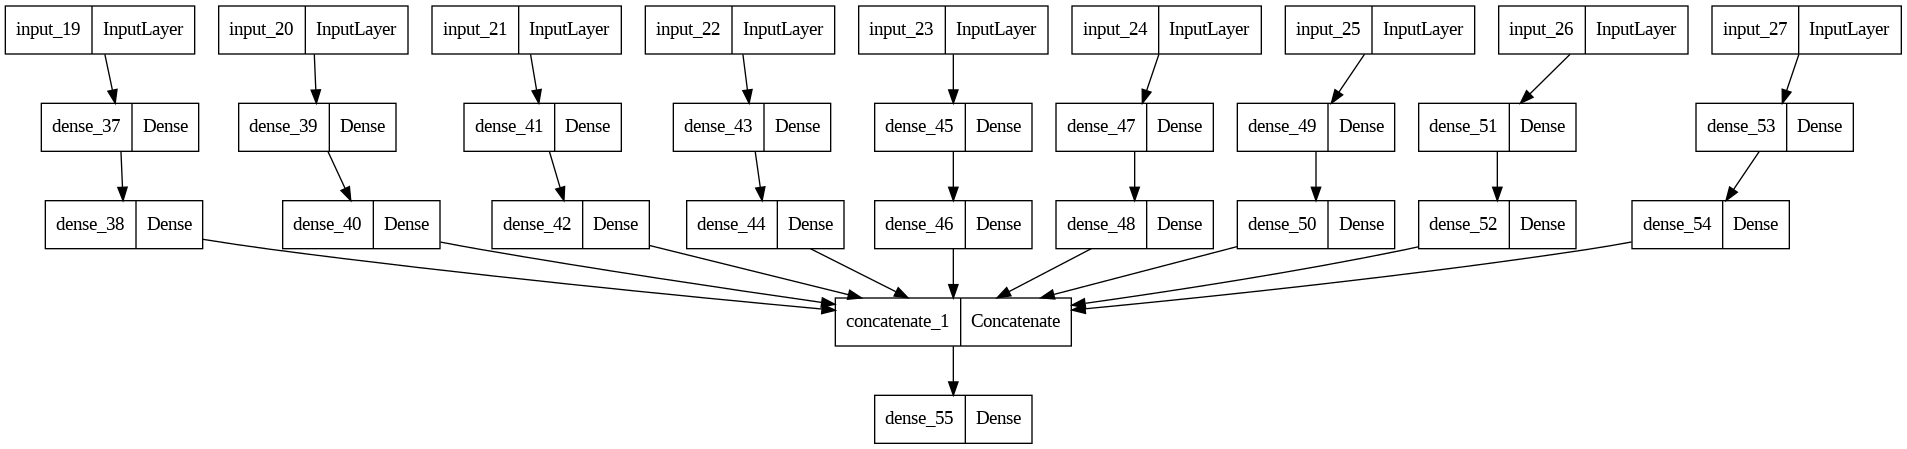

In [ ]:
# Plot model
tf.keras.utils.plot_model(model)

In [ ]:
# Compile model
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy')

In [ ]:
# Make data ready for multi-tailed model.
X_train_split = []
X_test_split = []
for d in range(D):
  X_train_split.append(X_train[:,:,d])
  X_test_split.append(X_test[:,:,d])

In [ ]:
print(len(X_train_split))

9


In [ ]:
# Fitting the model
history = model.fit(
    x=X_train_split,
    y=Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test_split, Y_test),
    callbacks=[model_checkpoint]
)

Epoch 1/20
230/230 [==============================] - 6s 8ms/step - loss: 0.6322 - accuracy: 0.7790 - val_loss: 0.4706 - val_accuracy: 0.8364
Epoch 2/20
 14/230 [>.............................] - ETA: 0s - loss: 0.2619 - accuracy: 0.9219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 1s 5ms/step - loss: 0.2285 - accuracy: 0.9225 - val_loss: 0.3569 - val_accuracy: 0.8656
Epoch 3/20
230/230 [==============================] - 1s 6ms/step - loss: 0.1673 - accuracy: 0.9406 - val_loss: 0.3154 - val_accuracy: 0.8826
Epoch 4/20
230/230 [==============================] - 1s 5ms/step - loss: 0.1364 - accuracy: 0.9512 - val_loss: 0.3046 - val_accuracy: 0.8812
Epoch 5/20
230/230 [==============================] - 1s 6ms/step - loss: 0.1209 - accuracy: 0.9554 - val_loss: 0.2837 - val_accuracy: 0.8894
Epoch 6/20
230/230 [==============================] - 1s 5ms/step - loss: 0.1091 - accuracy: 0.9612 - val_loss: 0.2783 - val_accuracy: 0.9033
Epoch 7/20
230/230 [==============================] - 1s 5ms/step - loss: 0.1031 - accuracy: 0.9634 - val_loss: 0.2540 - val_accuracy: 0.9118
Epoch 8/20
230/230 [==============================] - 2s 9ms/step - loss: 0.0953 - accuracy: 0.9660 - val_loss: 0.2379 - val_accuracy: 0.9152
Epoch 9/20
230/23

In [ ]:
# Load best model
best_model = tf.keras.models.load_model('best_model.h5')

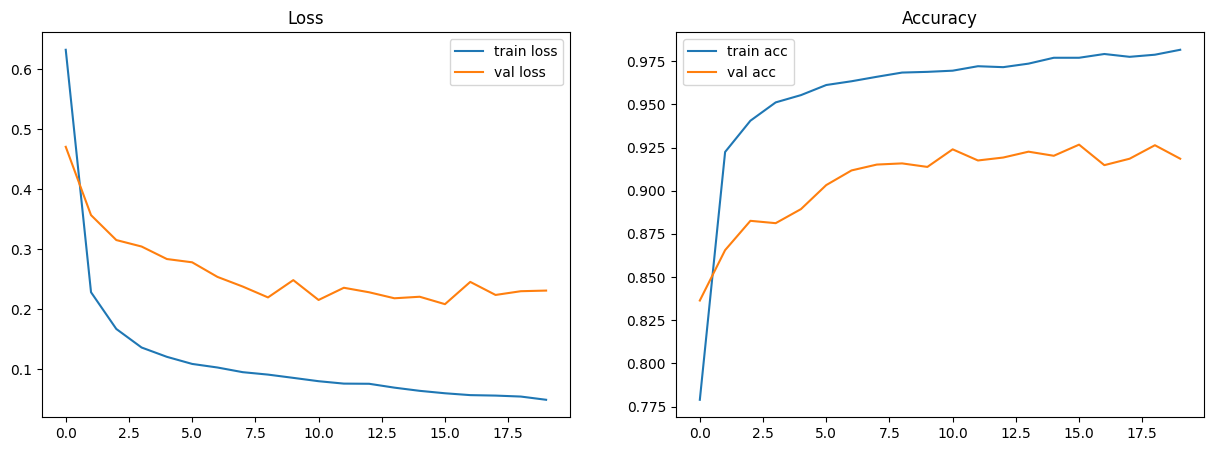

In [ ]:
# Draw loss and accuracy graphs
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='val loss')
ax[0].set_title('Loss')
ax[1].plot(history.history['accuracy'], label='train acc')
ax[1].plot(history.history['val_accuracy'], label='val acc')
ax[1].set_title('Accuracy')
ax[0].legend()
ax[1].legend();

In [ ]:
P_test = best_model.predict(X_test_split)

93/93 [==============================] - 1s 3ms/step


In [ ]:
#  Evaluate
np.mean(np.argmax(P_test, axis=1) == Y_test)

0.9267051238547676

## Let's try the features instead of using the time series

In [ ]:
# Import Standard Scalar
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


As the features is in X_train and X_test.txt, we will load them

In [ ]:
def load_data():
  """
    Return:
      X_train_feat, X_test_feat
  """
  df = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
  X_train_feat = df.to_numpy()

  df = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
  X_test_feat = df.to_numpy()

  # Let's Standardized the data
  scaler = StandardScaler()
  X_train_feat = scaler.fit_transform(X_train_feat)
  X_test_feat = scaler.transform(X_test_feat)

  return X_train_feat, X_test_feat

In [ ]:
X_train_feat, X_test_feat = load_data()

In [ ]:
print(X_train_feat.shape)
print(X_test_feat.shape)

(7352, 561)
(2947, 561)


In [ ]:
D_feat = X_train_feat.shape[1]

In [ ]:
model_checkpoint_basic = ModelCheckpoint('best_model_basic.h5', save_best_only=True, monitor='val_accuracy')

In [ ]:
# Let's define the basic ANN model
i = Input(shape = (D_feat,))
x = Dense(32, activation='relu')(i)
output = Dense(K)(x)
model = Model(i, output)

In [ ]:
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x=X_train_feat,
    y=Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test_feat, Y_test),
    callbacks=[model_checkpoint_basic]
    )

Epoch 1/20
230/230 [==============================] - 1s 4ms/step - loss: 0.3233 - accuracy: 0.8762 - val_loss: 0.2061 - val_accuracy: 0.9192
Epoch 2/20
 67/230 [=======>......................] - ETA: 0s - loss: 0.1137 - accuracy: 0.9618

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 1s 4ms/step - loss: 0.1043 - accuracy: 0.9642 - val_loss: 0.1659 - val_accuracy: 0.9359
Epoch 3/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0751 - accuracy: 0.9748 - val_loss: 0.1630 - val_accuracy: 0.9382
Epoch 4/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0606 - accuracy: 0.9796 - val_loss: 0.1711 - val_accuracy: 0.9369
Epoch 5/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9826 - val_loss: 0.1759 - val_accuracy: 0.9369
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9854 - val_loss: 0.1598 - val_accuracy: 0.9450
Epoch 7/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0429 - accuracy: 0.9852 - val_loss: 0.1573 - val_accuracy: 0.9471
Epoch 8/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9853 - val_loss: 0.1863 - val_accuracy: 0.9396
Epoch 9/20
230/23

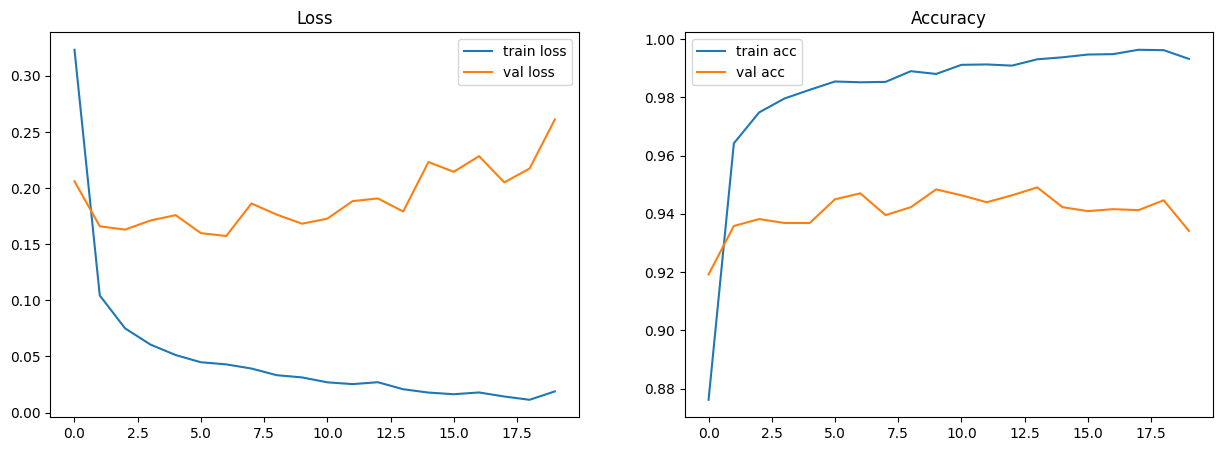

In [ ]:
# Let's draw the loss and accuracy graph
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='val loss')
ax[0].set_title('Loss')
ax[1].plot(history.history['accuracy'], label='train acc')
ax[1].plot(history.history['val_accuracy'], label='val acc')
ax[1].set_title('Accuracy')
ax[0].legend()
ax[1].legend();


In [ ]:
# Prediction
P_test = model.predict(X_test_feat)

93/93 [==============================] - 0s 4ms/step


In [ ]:
# Evaluate
np.mean(np.argmax(P_test, axis=1) == Y_test)

0.9341703427214116

As it has 93% accuracy which is betther the earlier time series based data

#### Let's try some other machine learning models

In [ ]:
# Linear Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_feat, Y_train)
lr.score(X_train_feat, Y_train)

0.9945593035908596

In [ ]:
lr.score(X_test_feat, Y_test)

0.9613165931455717

In [ ]:
# SVC
svc = SVC()
svc.fit(X_train_feat, Y_train)
svc.score(X_train_feat, Y_train)

0.9866702937976061

In [ ]:
svc.score(X_test_feat, Y_test)

0.9521547336274178

In [ ]:
# Let's try scv with linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train_feat, Y_train)
svc.score(X_train_feat, Y_train)

0.9968715995647442

In [ ]:
svc.score(X_test_feat, Y_test)

0.9609772650152698

As you can see it beats the svc version which is non linear

In [ ]:
# Let's try random forest
rf = RandomForestClassifier()
rf.fit(X_train_feat, Y_train)
rf.score(X_train_feat, Y_train)

1.0

In [ ]:
rf.score(X_test_feat, Y_test)

0.9253478113335596

As you can see working with features engineering is quiet useful

## Let's combine both of the above method to create one gaint NN

In [ ]:
inputs = []
features = []
for d in range(D):
  i = Input((T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)


In [ ]:
i2 = Input((D_feat,))
x2 = Dense(32, activation='relu')(i2)

In [ ]:
x = Concatenate()([*features, x2])
output = Dense(K)(x)
model = Model([*inputs, i2], output)

In [ ]:
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model_checkpoint_combined = ModelCheckpoint('best_model_combined.h5', save_best_only=True, monitor='val_accuracy')

In [ ]:
history = model.fit(
    x=[*X_train_split, X_train_feat],
    y=Y_train,
    batch_size=32,
    epochs=20,
    validation_data=([*X_test_split, X_test_feat], Y_test),
    callbacks=[model_checkpoint_combined]
)

Epoch 1/20
230/230 [==============================] - 9s 9ms/step - loss: 0.3149 - accuracy: 0.8882 - val_loss: 0.2582 - val_accuracy: 0.9104
Epoch 2/20
 14/230 [>.............................] - ETA: 0s - loss: 0.1138 - accuracy: 0.9621

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 2s 7ms/step - loss: 0.0950 - accuracy: 0.9672 - val_loss: 0.2008 - val_accuracy: 0.9287
Epoch 3/20
230/230 [==============================] - 1s 6ms/step - loss: 0.0677 - accuracy: 0.9769 - val_loss: 0.1639 - val_accuracy: 0.9410
Epoch 4/20
230/230 [==============================] - 2s 7ms/step - loss: 0.0531 - accuracy: 0.9825 - val_loss: 0.1762 - val_accuracy: 0.9444
Epoch 5/20
230/230 [==============================] - 2s 7ms/step - loss: 0.0460 - accuracy: 0.9835 - val_loss: 0.1721 - val_accuracy: 0.9457
Epoch 6/20
230/230 [==============================] - 2s 10ms/step - loss: 0.0423 - accuracy: 0.9857 - val_loss: 0.1759 - val_accuracy: 0.9413
Epoch 7/20
230/230 [==============================] - 4s 15ms/step - loss: 0.0372 - accuracy: 0.9856 - val_loss: 0.1520 - val_accuracy: 0.9559
Epoch 8/20
230/230 [==============================] - 2s 10ms/step - loss: 0.0350 - accuracy: 0.9872 - val_loss: 0.1513 - val_accuracy: 0.9525
Epoch 9/20
230

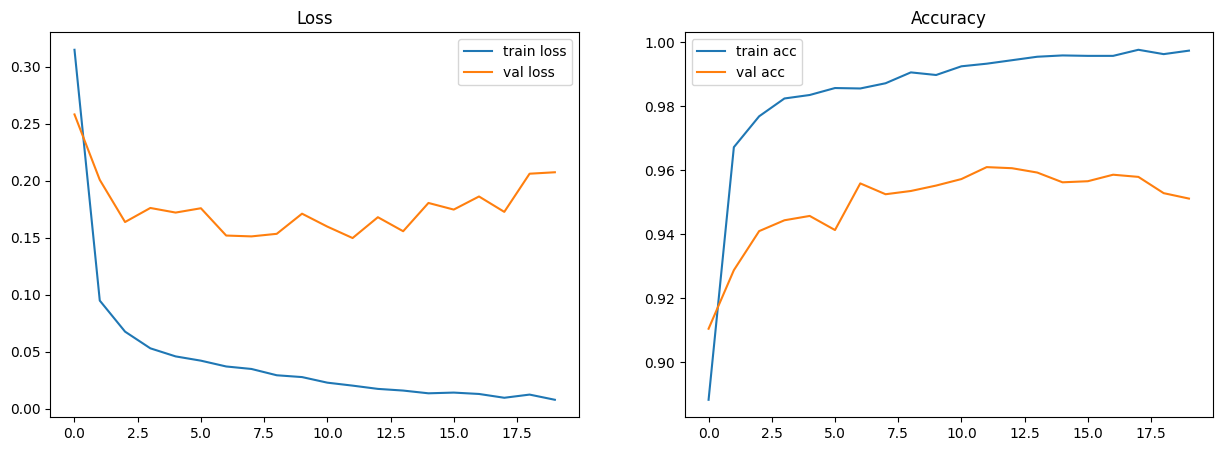

In [ ]:
# Let's plot the loss and accuracy graphs
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='val loss')
ax[0].set_title('Loss')
ax[1].plot(history.history['accuracy'], label='train acc')
ax[1].plot(history.history['val_accuracy'], label='val acc')
ax[1].set_title('Accuracy')
ax[0].legend()
ax[1].legend();

In [ ]:
best_model_combined = tf.keras.models.load_model('best_model_combined.h5')

In [ ]:
P_test = best_model_combined.predict([*X_test_split, X_test_feat])

93/93 [==============================] - 1s 4ms/step


In [ ]:
# Evaluate
np.mean(np.argmax(P_test, axis=1) == Y_test)

0.9609772650152698

As you can see it does better and even same as usign only features